<a href="https://colab.research.google.com/github/siddharth-iyer1/460J-Labs/blob/main/Data_Science_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Lab: Lab 1 by Varun Chowdary, Siddharth Iyer, Boris He

Submit:

A pdf of your notebook with solutions.
A link to your colab notebook or also upload your .ipynb if not working on colab.

**Goals of this Lab:**
1.  Review important results from probability, such as the CLT.
2.  Connecting that review with basic Python commands.
3.  Practice with Pandas, Numpy and Data Exploration.


In [1]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng


#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility
rng = default_rng()


<ipython-input-1-57337bb459e9>:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 1

**Part 1.** Generate 1,000 samples of 2 dimensional data from the Gaussian distribution $\left(\begin{array}{cc}X_{i}\\Y_{i}\end{array}\right)∼N\biggl(\left(\begin{array}{cc}-5\\5\end{array}\right),\left(\begin{array}{cc}2 & 0.8\\0.8 & 3\end{array}\right)\biggr)$.

**Part 2.** Plot these points.

**Part 3.** Find the Eigenvectors and Eigenvalues of the covariance matrix using np.linalg.eig, or np.linalg.eigh, or something else of your choice.

**Part 4.** Now take the 1,000 points you generated in the first part, and use them to estimate the mean and covariance matrix for this multi-dimensional data using elementary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

*Remark*: If you did this correctly: You should have made a number of observations. (i) The points you plotted should look like an elongated ellipse. (ii) The axis of elongation (the major axis of the ellipse) should be aligned with the eigenvector you computed that has the largest eigenvalue. The minor axis, should be aligned with the other eigenvector you computed. (iii) In the last part, you computed what is called the *empirical covariance* matrix. This should be quite close to the covariance matrix you used to generate the data. If we used more and more points (10,000, 100,000, etc.), then our empirical estimate would look more and more like what we used to generate the data.


[1.55660189 3.44339811]
[[-0.87464248 -0.48476853]
 [ 0.48476853 -0.87464248]]
[[1.97989687 0.67323524]
 [0.67323524 2.80766946]]


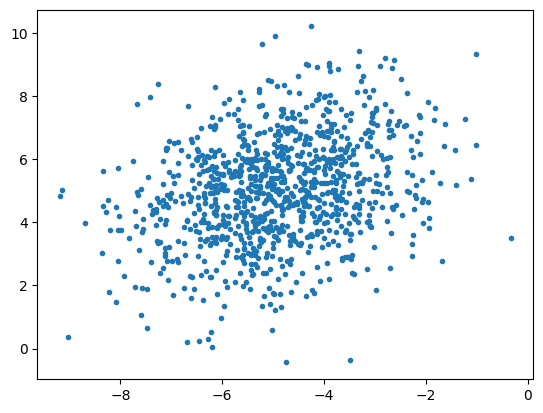

In [ ]:
# Problem 1

# Part 1
mean = [-5,5]
cov = [[2,.8], [.8,3]]
samples = np.random.multivariate_normal(mean, cov, 1000)

# Part 2
plt.plot(samples[:,0], samples[:,1], ".")

# Part 3
eigvalues, eigvectors = np.linalg.eig(cov)
print(eigvalues)
print(eigvectors)

# Part 4
length = len(samples)
total_sum = np.sum(samples, axis = 0)
est_mean = total_sum/length

sd = samples - est_mean
print((sd.T @ sd)/(length - 1))


# For problem 1, The code generates 1000 samples from a 2-dimensional multivariate normal distribution with specified mean and covariance matrix. It then plots these samples on a scatter plot to visualize the distribution.
# For part 3, eigenvalues and eigenvectors of the covariance matrix are computed using NumPy's linear algebra module. This can be useful to understand the variance in the data along different directions.
# For part 4, the code calculates the estimated mean of the samples by averaging them. Then, it computes the sample covariance matrix by subtracting the estimated mean from each sample, transposing, and matrix-multiplying it with its transpose, and normalizing by the number of samples minus one.
# This part of the code is an implementation of the sample covariance matrix calculation, which is a fundamental concept in statistics for understanding the variance and covariance of data features.




# Problem 2: Central Limit Theorem

Back in EE351K you learned the Law of Large Numbers, and the Central Limit Theorem, among many other things. The Law of Large Numbers says that if $X_i$ are independent and identically distributed (iid) random variables, then $(1/N) \sum X_i$ converges to $\mathbb{E}[X]$. That's the law of large numbers.

You also learned the Central Limit Theorem. This says that if $X_i$ are zero mean, have variance 1, and are iid, then $(1/\sqrt{N}) \sum X_i$ converges to a random variable. Which random variable? A standard (zero mean, unit variance) Gaussian.

We're going to check the central limit theorem empirically, as an excuse to do more practice with Python and numpy and basic plotting.

Let $X_i$ be an iid Bernoulli random variable with value \{-1,1\}. Look at the random variable
$Z_n = \frac{1}{\sqrt{n}}\sum X_i$. By taking 1000 samples from $Z_n$, plot its histogram. {\bf Note:} To generate 1,000 samples from $Z_n$, you need to generate $1,000 \times n$ samples of $X_i$, since each $Z$ needs $1,000$ $X_i$'s. Now check that for small $n$ (set $n= 5$) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (set $n = 50$) it looks much more like a Gaussian. Check also for much bigger $n$: $n = 250$, to see that at this point, one can really see the bell curve.

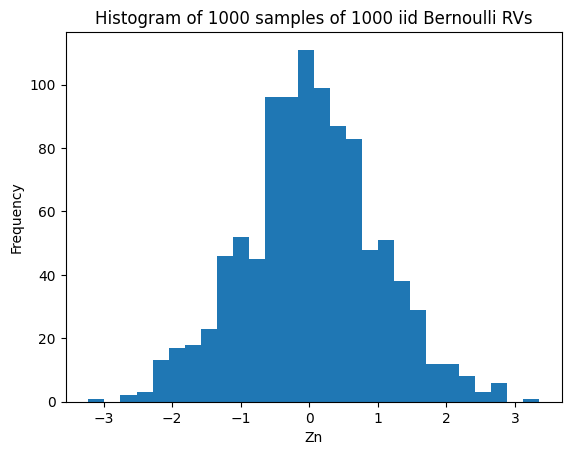

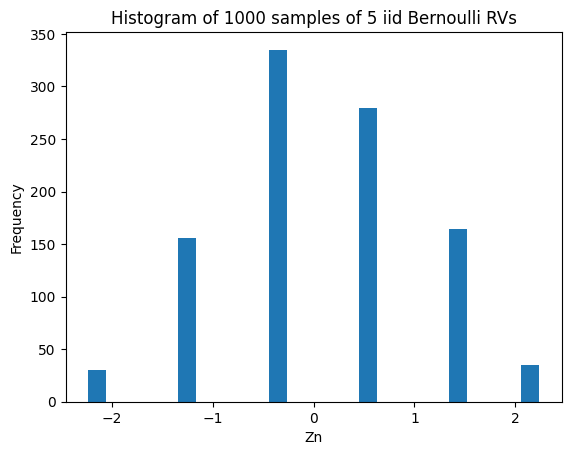

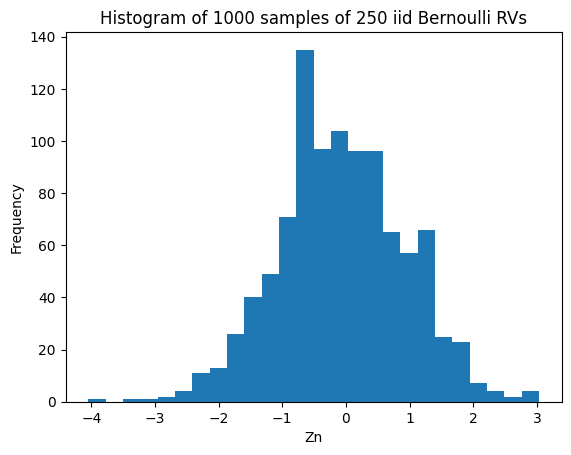

In [ ]:
# Function Definition
def z_trial(num_z, num_xi):
  zn = np.array([])
  for i in range(num_z):
    # Generate 1000 iid Bernoulli random variables with p = 0.5
    bernoulli_trials = np.random.binomial(1, 0.5, num_xi)

    # Convert 0s to -1s
    bernoulli_trials = bernoulli_trials * 2 - 1

    z = 1/(np.sqrt(num_xi)) * np.sum(bernoulli_trials)

    zn = np.append(zn, z)

  # print(zn)
  plt.hist(zn, bins='auto')  # 'auto' lets Matplotlib decide the number of bins
  plt.title(f'Histogram of {num_z} samples of {num_xi} iid Bernoulli RVs')
  plt.xlabel('Zn')
  plt.ylabel('Frequency')
  plt.show()

# Part 1: Histogram of 1000 samples of Z

z_trial(1000, 1000)

# Part 2: 1000 samples of Z, with 5 samples of Xi in every Z

z_trial(1000, 5)

# Part 3: 1000 samples of Z, with 250 samples of Xi in every Z

z_trial(1000, 250)


# The code defines a function 'z_trial' to generate and plot the distribution of 'Z', which is the normalized sum of 'num_xi' iid Bernoulli trials, transformed to take values -1 and 1. 'num_z' samples of 'Z' are generated and visualized in a histogram.
# Part 1: Generates a histogram of 1000 'Z' samples, each based on 1000 iid Bernoulli trials, to illustrate the Central Limit Theorem.
# Part 2: Similar to Part 1 but with each 'Z' based on 5 Bernoulli trials, showing the distribution with fewer trials.
# Part 3: Uses 250 Bernoulli trials for each 'Z', demonstrating the distribution's approach to normality with an increasing number of trials.

# Problem 3

Download from Canvas/Files the datasetPatientData.csv. Each row is a patient and the last column is the condition that the patient has.  Do data exploration using Pandas and other visualization tools to understand what you can about the data set. For example:

Part 1.  How many patients and how many features are there?

Part 2.  What is the meaning of the first 4 features?  See if you can understand what they mean.

Part 3.  Are there missing values?  Replace them with the average of the corresponding feature column

Part 4.  How could you test which features strongly influence the patient condition and which do not? List what you think are the three most important features.

In [ ]:
# Part 1:

#df = pd.read_csv('/content/PatientData.csv')
df = pd.read_csv('/content/sample_data/PatientData.csv')

shape = df.shape

num_rows = shape[0]
num_cols = shape[1]


# Part 1:
print(f"Number of Patients: {num_rows}")
print(f"Number of Features: {num_cols}")

# There are 451 patients with 280 features.
# Using the shape method in pandas, we could find the dimensions of the csv file,

Number of Patients: 451
Number of Features: 280


In [ ]:
# Part 2:
# Basic Statistics
print('\n')
print("Basic Statistics for the first feature (suspected age):")
print(df.iloc[:, 0].describe())
print('\n')
print("Basic Statistics for the second feature (suspected gender):")
print(df.iloc[:, 1].describe())
print('\n')
print("Basic Statistics for the third feature (suspected height in cm):")
print(df.iloc[:, 2].describe())
print('\n')
print("Basic Statistics for the fourth feature (suspected weight in kg):")
print(df.iloc[:, 3].describe())

# Using the describe feature in pandas, we looked at the statistics of the first four
# features. Just visually, seeing that the outputs were around common values for those characteristics,
# we made out assumptions.
# Column 1: min and max are within 0-100, with a median around a typically country's median age.
# Column 2: Binary values. Since this is health data, the only binary we could think of was the presence
# of some illness or gender. We went with gender as this is one of the first columns in the dataset
# Column 3/4: Median and standard deviation fall in line with typical heights and weights for average
# people. Outliers like babies also fell in line with expected heights/weights.



Basic Statistics for the first feature (suspected age):
count    451.000000
mean      46.407982
std       16.429846
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: 75, dtype: float64


Basic Statistics for the second feature (suspected gender):
count    451.000000
mean       0.552106
std        0.497830
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 0, dtype: float64


Basic Statistics for the third feature (suspected height in cm):
count    451.000000
mean     166.135255
std       37.194646
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: 190, dtype: float64


Basic Statistics for the fourth feature (suspected weight in kg):
count    451.000000
mean      68.144124
std       16.599841
min        6.000000
25%       59.000000
50%       68.000000
75%       78.500000
max      176.000000
Name: 80, dtype: float64


In [ ]:
# Part 3:

df.replace('?', np.nan, inplace=True)

# Convert columns to numeric, if they are not already
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace NaNs with the mean of the column
df.fillna(df.mean(), inplace=True)

# Print the DataFrame with replacements
df

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Part 4
# Correlation Analysis: Begin by performing a correlation analysis between each feature and the
# patient condition. This can help identify which features have a linear/any other kind
# of relationship with the patient condition. Keep in mind that correlation does not imply causation,
# and some variables might be correlated due to other underlying factors.

# We think, given the first four columns we deciphered, that age, weight, and gender, are the most
# important. This is because age is highly correlated with the risk of health issues, weight, primarily
# things like obesity are very positively correlated with the development of health issues, and gender
# can help determine the risk of gender specific health issues such as very obvious things like
# testicular and ovarian cancer.

# Problem 4

The goal of this exercise is for you to get more experience with Pandas, and to get a chance to explore a cool data set.  Download the fileNames.zip from Canvas.  This contains the frequency of all names that appeared more than 5 times on a social security application from 1880 through 2015.

Part 1. Write a program that on input $k$ and XXXX, returns the top $k$ names from year XXXX.

Part 2. Write a program that on input Name returns the frequency for men and women of the name Name.

Part 3. It could be that names are more diverse now than they were in 1880, so that a name may be relatively the most popular, though its frequency may have been decreasing over the years.  Modify the above to return the relative frequency.

Part 4. Find all the names that used to be more popular for one gender, but then became more popular for another gender.

•(Optional) Find something cool about this data set.

In [ ]:
import zipfile as zf

# Part 1:
zip = zf.ZipFile('/content/Names.zip')

def topK(k, year):
    path = zip.open(f'Names/yob{year}.txt')
    data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

    # Sort data by 'Freq' in descending order
    sorted_data = data.sort_values(by='Freq', ascending=False)

    # Return the top k rows
    return sorted_data.head(k)

topK(10, 2015)

,Name,Gender,Freq
0,Emma,F,20355
1,Olivia,F,19553
18993,Noah,M,19511
18994,Liam,M,18281
2,Sophia,F,17327
18995,Mason,M,16535
3,Ava,F,16286
18996,Jacob,M,15816
18997,William,M,15809
4,Isabella,F,15504


In [27]:
# Part 2:

zip = zf.ZipFile('/content/Names.zip')

def both_gender_freq(name):
  male_freq = 0
  female_freq = 0
  for i in range(1880, 2016):
    path = zip.open(f'Names/yob{i}.txt')
    data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

    # Filter data for the given name and sum the frequencies for each gender
    filtered_data = data[data['Name'] == name]

    m = filtered_data[filtered_data['Gender'] == 'M']['Freq'].sum()
    f = filtered_data[filtered_data['Gender'] == 'F']['Freq'].sum()

    male_freq += filtered_data[filtered_data['Gender'] == 'M']['Freq'].sum()
    female_freq += filtered_data[filtered_data['Gender'] == 'F']['Freq'].sum()

    # print("Male Frequency of the name " + name + " during year " + str(i) + ": " + str(m))
    # print("Female Frequency of the name " + name + " during year " + str(i) + ": " + str(f))
    # print()

  return male_freq, female_freq

name = "Alex"

m, f = both_gender_freq(name)
print("===========================================================")
print()
print("Overall Male Frequency of the name " + name + " from 1880 to 2016: " + str(m))
print("Overall Female Frequency of the name " + name + " from 1880 to 2016: " + str(f))


Overall Male Frequency of the name Alex from 1880 to 2016: 264449
Overall Female Frequency of the name Alex from 1880 to 2016: 8406


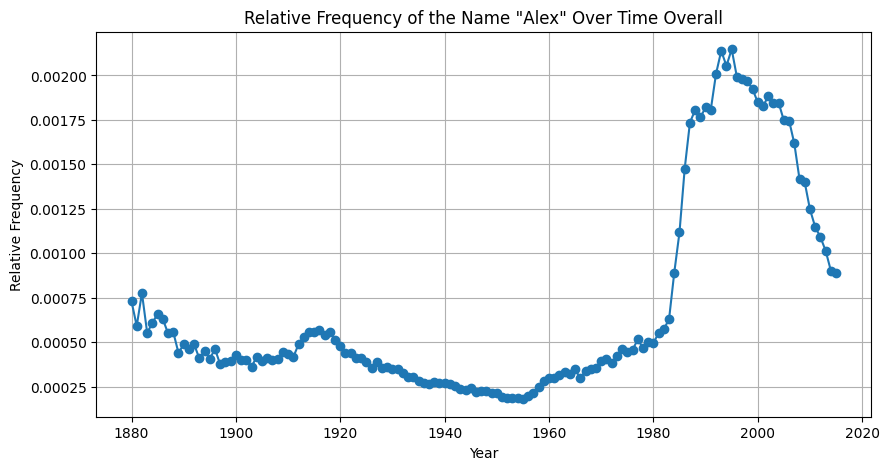

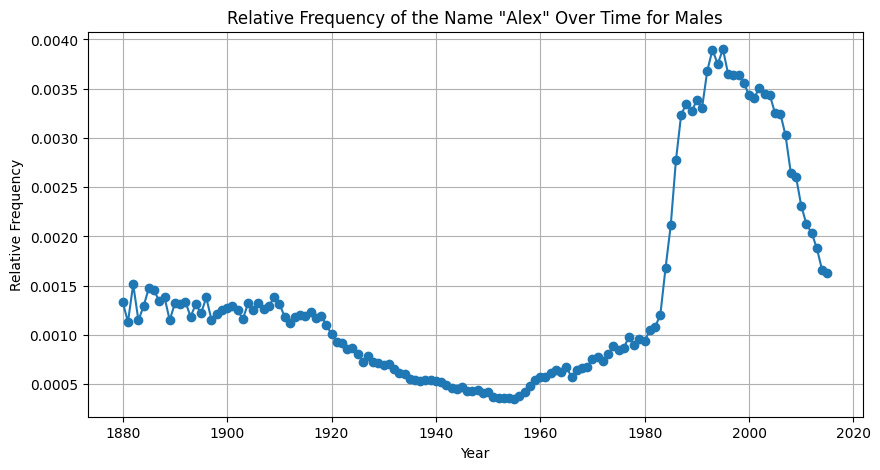

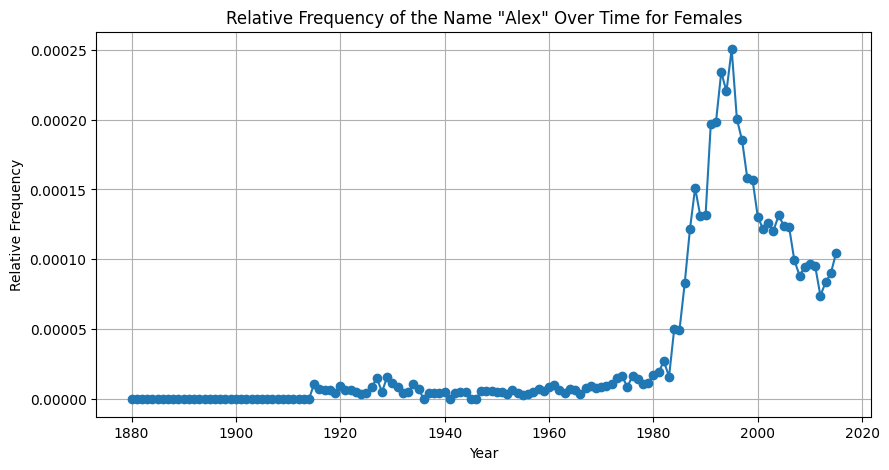

In [ ]:
# Part 3:

zip = zf.ZipFile('/content/Names.zip')


# Overall
def overall_relative_popularity(name):
  relative_freq_over_time = {}

  for i in range(1880, 2016):
      path = zip.open(f'Names/yob{i}.txt')
      data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

      # Total births in the year
      total_births = data['Freq'].sum()

      # Frequency of the specific name
      name_freq = data[data['Name'] == name]['Freq'].sum()

      # Calculate relative frequency
      relative_frequency = name_freq / total_births if total_births > 0 else 0
      relative_freq_over_time[i] = relative_frequency

  return relative_freq_over_time

# Just Males
def male_relative_popularity(name):
  relative_freq_over_time = {}

  for i in range(1880, 2016):
      path = zip.open(f'Names/yob{i}.txt')
      data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

      # Total Male Births
      total_births = data[data['Gender'] == 'M']['Freq'].sum()

      # Frequency of the specific name
      name_freq = data[data['Name'] == name][data['Gender'] == 'M']['Freq'].sum()

      # Calculate relative frequency
      relative_frequency = name_freq / total_births if total_births > 0 else 0
      relative_freq_over_time[i] = relative_frequency

  return relative_freq_over_time

# Just Females
def female_relative_popularity(name):
  relative_freq_over_time = {}

  for i in range(1880, 2016):
      path = zip.open(f'Names/yob{i}.txt')
      data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

      # Total Male Births
      total_births = data[data['Gender'] == 'F']['Freq'].sum()

      # Frequency of the specific name
      name_freq = data[data['Name'] == name][data['Gender'] == 'F']['Freq'].sum()

      # Calculate relative frequency
      relative_frequency = name_freq / total_births if total_births > 0 else 0
      relative_freq_over_time[i] = relative_frequency

  return relative_freq_over_time


# Now to return and plot the data for the name "Alex" overall, and for men, and women
name = "Alex"
name_relative_freq = overall_relative_popularity(name)


years = list(name_relative_freq.keys())
rel_freqs = list(name_relative_freq.values())

plt.figure(figsize=(10, 5))
plt.plot(years, rel_freqs, marker='o')
plt.title(f'Relative Frequency of the Name "{name}" Over Time Overall')
plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.show()

# Men
name = "Alex"
name_relative_freq = male_relative_popularity(name)


years = list(name_relative_freq.keys())
rel_freqs = list(name_relative_freq.values())

plt.figure(figsize=(10, 5))
plt.plot(years, rel_freqs, marker='o')
plt.title(f'Relative Frequency of the Name "{name}" Over Time for Males')
plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.show()

# Women
name = "Alex"
name_relative_freq = female_relative_popularity(name)


years = list(name_relative_freq.keys())
rel_freqs = list(name_relative_freq.values())

plt.figure(figsize=(10, 5))
plt.plot(years, rel_freqs, marker='o')
plt.title(f'Relative Frequency of the Name "{name}" Over Time for Females')
plt.xlabel('Year')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.show()

# A cool observation here is that the name Alex was not really used among females
# until the late 1900s and early 2000s. Furthermore, since the male popularity of the
# name is so much higher than the female popularity, the overall trend follows very
# similar to the male popularity while the female popularity, being much different
# from the male, does not follow as closely.

In [ ]:
import pandas as pd
import zipfile as zf

zip = zf.ZipFile('/content/Names.zip')

gender_popularity = {}

# For every year, calculate the popularity of some name based of the frequency of that name for both genders
for year in range(1880, 2016):
    path = zip.open(f'Names/yob{year}.txt')
    data = pd.read_csv(path, sep=',', names=['Name', 'Gender', 'Freq'])

    total_births = data['Freq'].sum()

    year_data = set()

    for _, row in data.iterrows():
        name = row['Name']
        gender = row['Gender']
        freq = row['Freq']

        if name not in gender_popularity:
            gender_popularity[name] = {'M': [], 'F': []}

        gender_popularity[name][gender].append((year, freq/total_births))
        year_data.add((name, gender))

    # Ensure that each name has an entry for both genders in each year
    for name in gender_popularity:
        if (name, 'M') not in year_data:
            gender_popularity[name]['M'].append((year, 0))
        if (name, 'F') not in year_data:
            gender_popularity[name]['F'].append((year, 0))

In [32]:
originals = {}
switched_names = set()
SIGNIFICANT_DIFFERENCE = 0.001      # Global for how significant we care about the male/female difference

for name, popularities in gender_popularity.items():

  # Figure out what the name was more popular for initially

  if popularities['M'][0] > popularities['F'][0]:
    originals[name] = 'M'
  else:
    originals[name] = 'F'

  for yr in range(len(popularities['M'])):
    # Compare popularities, only include significant differences
    if popularities['M'][yr][1] > popularities['F'][yr][1] and popularities['M'][yr][1] - popularities['F'][yr][1] > SIGNIFICANT_DIFFERENCE:
      # If started as female, then male, add to set
      if originals[name] != 'M':
        switched_names.add(name)
      # Switch back
      if originals[name] == 'M':
        switched_names.discard(name)

    # Do the same for females
    if popularities['F'][yr][1] > popularities['M'][yr][1] and popularities['F'][yr][1] - popularities['M'][yr][1] > SIGNIFICANT_DIFFERENCE:
      # If started as male, then female, add to set
      if originals[name] != 'F':
        switched_names.add(name)
      # Switch back
      if originals[name] == 'F':
        switched_names.discard(name)

print("List of Names who were popular for one gender, but then switched:")
for name in switched_names:
  print(name + ' was originally more popular for ' + originals[name] + ' but switched to the other gender.')

print('\n')
print(str(len(switched_names)) + ' names experienced this phenomena')

List of Names who were popular for one gender, but then switched:
Leslie was originally more popular for M but switched to the other gender.
Kelly was originally more popular for M but switched to the other gender.
Ashley was originally more popular for M but switched to the other gender.
Ronnie was originally more popular for F but switched to the other gender.
Kelsey was originally more popular for M but switched to the other gender.
Madison was originally more popular for M but switched to the other gender.
Robin was originally more popular for M but switched to the other gender.
Christy was originally more popular for M but switched to the other gender.
Stacey was originally more popular for M but switched to the other gender.
Lynn was originally more popular for M but switched to the other gender.
Sydney was originally more popular for M but switched to the other gender.
Marion was originally more popular for M but switched to the other gender.
Beverly was originally more popular 

In [ ]:
# Optional: Reference Part 3

# Problem 5

We looked at the MNIST data set in class. Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision. You can find the MNIST data set which we will use, here: https://www.openml.org/d/554. Though we haven't introduced decision trees formally, we have had a chance to see them in action in class. This exercise is an opportunity to play around with this data set, and in advance of when we get to talk about decision trees in detail, have a chance to see how they work. In short, this is an exercise in learning-by-doing.


Part 1. (Nothing to submit) Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

Part 8. Fix the depth of the three, say, depth=7. Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points, always computing testing score by evaluating on the complement of the training set. Plot this trend.  Try to explain what you are seeing.  


In [ ]:
# Part 2:

from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# mnist = fetch_openml('mnist_784', version=1)

# # Convert the data and target to a Pandas DataFrame
# df = pd.DataFrame(mnist['data'])
# mnist_target = pd.Series(mnist['target'])

# # Add the target to the DataFrame
# df['target'] = mnist_target

df = pd.read_csv('/content/mnist_784.csv')

shape = df.shape

num_rows = shape[0]
num_cols = shape[1]

df.shape

# There are 70000 datapoints with 785 features. 784 of the features represent pixels on a 28x28 pixel
# grid, which hold a value from 0-255 representing the intensity of the darkness of that pixel. The last
# feature represents the correct number value the drawing represents.

(70000, 785)

In [ ]:
# Part 3:
count = df.iloc[:, -1].value_counts()
print(count)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


In [ ]:
# Part 4:
# sklearn.model_selection.train_test_split is a package that creates a training and testing split for
# users wishing to create a machine learning model. It by default shuffles data, and based on user
# specifications will split the data into a training set, which the model will be created from, and
# an unseen testing split, which the model, trained on the training set, will be tested for accuracy.

In [ ]:
# Part 5:
# The score returned by DecisionTreeClassifier is a metric that returns the mean accuracy of the model.
# This is calculated by finding the percent of testing data that the model is able to correctly
# classify. The higher the score, the better, while a score of 1.0 indicates a perfect model.

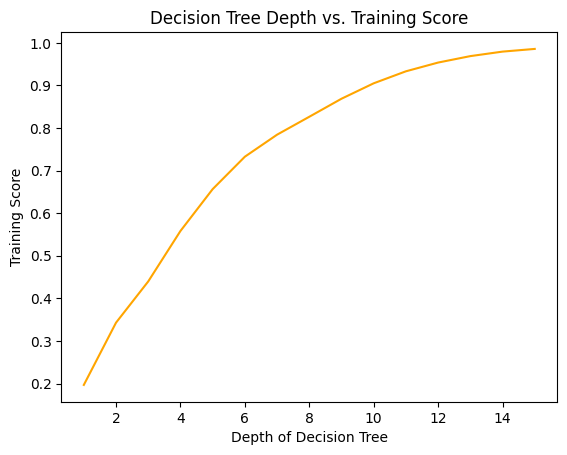

In [ ]:
# Part 6
x, y = df.iloc[:, :-1], df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_depth_range = range(1, 16)
train_scores = []

for depth in max_depth_range:
    curr_decision_tree = DecisionTreeClassifier(max_depth=depth)
    curr_decision_tree.fit(x_train, y_train)
    train_score = curr_decision_tree.score(x_train, y_train)
    train_scores.append(train_score)

plt.plot(max_depth_range, train_scores, color='orange')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Training Score')
plt.title('Decision Tree Depth vs. Training Score')
plt.show()

# As the depth of the decision tree increases, the training score increases. Since the depth of the
# tree is enough to contain so many categories at a large depth, on a training set, we can expect the
# score to increase greatly as we adjust the model to the data given in the training set. After a
# certain depth, however, it begins to level off.

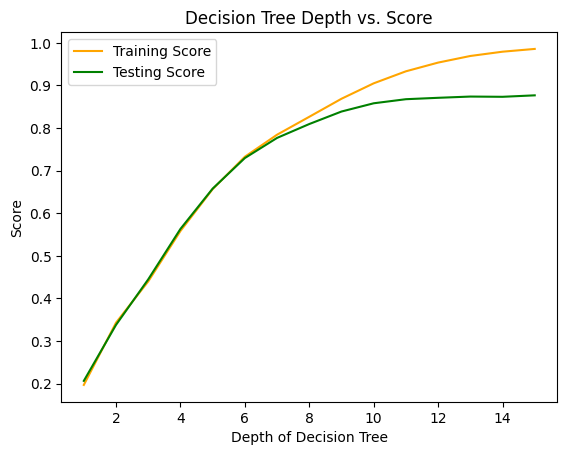

In [ ]:
# Part 7
x, y = df.iloc[:, :-1], df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_depth_range = range(1, 16)
train_scores = []
test_scores = []

for depth in max_depth_range:
    curr_decision_tree = DecisionTreeClassifier(max_depth=depth)
    curr_decision_tree.fit(x_train, y_train)
    train_score = curr_decision_tree.score(x_train, y_train)
    test_score = curr_decision_tree.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(max_depth_range, train_scores, color='orange', label='Training Score')
plt.plot(max_depth_range, test_scores, color='green', label='Testing Score')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Score')
plt.title('Decision Tree Depth vs. Score')
plt.legend()
plt.show()

# Low Depth: Both training and testing scores are low so the model is too simple to capture
# data patterns well. Medium Depth: Training and testing scores improve with more data, so the model
# starts to generalize better. High Depth (Overfitting): Training score keeps rising, possibly to
# perfection, as the model memorizes the training data. However, testing score doesn't match this
# behavior due to the model's inability to generalize, indicating overfitting.

# Problem 6

We now turn to a somewhat more sophisticated data set: CIFAR10.
Here is an initial colab notebook: https://colab.research.google.com/drive/1H3a4yVuZLatBvFjrUp5aFBJn_vfmXj7o?usp=sharing

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. There are two ``TO DOs'' listed in the colab notebook. Complete these.


If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!

In [ ]:
#Part 1:

# no. of datapoints: 60000
# no. of labels: 10
# no. of points for each label: 6000

In [ ]:
# Problem 6 colab notebook: https://colab.research.google.com/drive/10lKckMKCB6W6mavvR9efTmLylnHF4Y0G#scrollTo=9q_diLaD4nLa